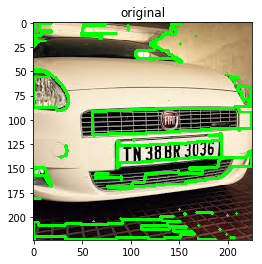

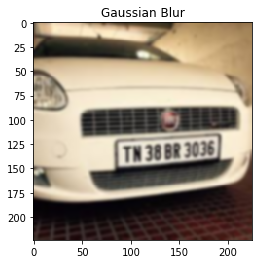

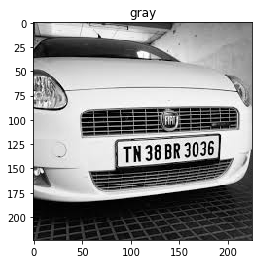

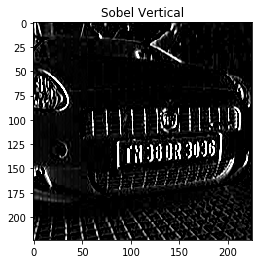

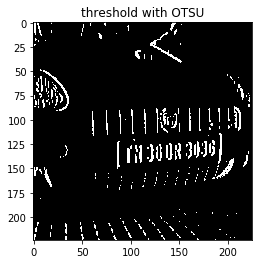

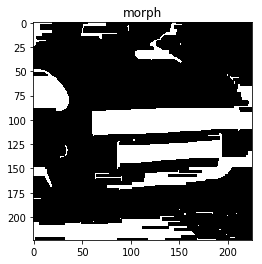

((149.28823852539062, 142.24705505371094), (150.40184020996094, 49.929420471191406), -4.39870548248291)


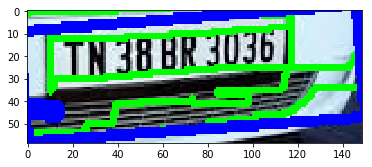

((142.49325561523438, 89.79888916015625), (164.5181427001953, 46.97356033325195), -1.921955943107605)


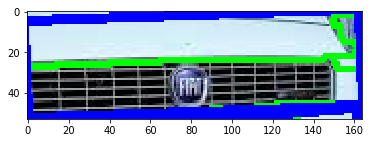

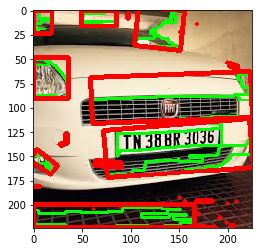

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/car1.jpg')
# 가우시안 블러 (노이즈제거)
imgBlurred = cv2.GaussianBlur(img, (7, 7), 0)
# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# sobelX to get the vertical edges
sobelx = cv2.Sobel(gray, cv2.CV_8U, 1, 0, ksize=3) 
# 오츠알고리즘
ret2, threshold_img = cv2.threshold(sobelx, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# getStructuringElement ??
# 모폴로지 커널 사이즈
element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(23, 3))
morph_img_threshold = threshold_img.copy()
cv2.morphologyEx(src=threshold_img, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)

# 컨투어 추출
_, extracted_contours, _ = cv2.findContours(morph_img_threshold, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, extracted_contours, -1, (0,255,0), 2)
plt.title('original'),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.show()
plt.title('Gaussian Blur'),plt.imshow(cv2.cvtColor(imgBlurred,cv2.COLOR_BGR2RGB)),plt.show()
plt.title('gray'),plt.imshow(gray,cmap='gray'),plt.show()
plt.title('Sobel Vertical'),plt.imshow(sobelx,cmap='gray'),plt.show()
plt.title('threshold with OTSU'),plt.imshow(threshold_img,cmap='gray'),plt.show()
plt.title('morph'),plt.imshow(morph_img_threshold,cmap='gray'),plt.show()

def check_rect(rect):
    minArea = 4500
    maxArea = 30000
    ratioMin = 2.5
    ratioMax = 7
    (x, y), (width, height), rect_angle = rect
    # angle preprocess
    if (width > height):
        angle = -rect_angle
    else:
        angle = 90 + rect_angle
    # 앵글이 15도 이상 틀어져있으면 False
    if angle > 15:
        return False    
    #rect 넓이 저장
    area = width*height
    #ratio 범위 1:2.5 ~ 1:7
    try:
        ratio = float(width)/float(height)
    except:
        pass
    # 범위밖 이거나, 비율이 다를경우 False 리턴
    if (area < minArea or area > maxArea) or (ratio < ratioMin or ratio > ratioMax):
        return False
    return True

chk = False
# minrect 이용
for cnts in extracted_contours:
    min_rect = cv2.minAreaRect(cnts)
    box = cv2.boxPoints(min_rect)
    box = np.int0(box)
    cv2.drawContours(img,[box],0,(0,0,255),3)
    # 컨투어를 둘러싸는 박스 찾기
    if check_rect(min_rect):
        print(min_rect)
        box = cv2.boxPoints(min_rect)
        box = np.int0(box)
#         cv2.drawContours(img,[box],0,(0,0,255),3)
#         cv2.drawContours(img, cnts, -1, (0,255,0), 2)
        x, y, w, h = cv2.boundingRect(cnts)
        after_validation_img = img[y:y+h, x:x+w]
        plt.imshow(after_validation_img)
        plt.show()
        chk = True

if not chk :
    print('못찾음')
        
# plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()